# Part I - (Prosper Loan Dataset)
## by (Ikuku Success Owhorode)

## Introduction
> I am working on the prosper loan dataset. I would be checking the data for possible irregularities, any detected issues would be cleaned. I would also explore the dataset and generate useful insights from it. Finally, I would visualize my findings using the required python libraries.
## Preliminary Wrangling


In [7]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [8]:
loan = pd.read_csv("prosperLoanData.csv")
loan.head(6)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [9]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [10]:
loan.sample(6)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
50819,1D44351783727104990CC56,511367,2011-06-13 08:09:17.750000000,NaN,36,Current,NaN,0.34621,0.3099,0.2999,...,-70.29,0.0,0.00,0.00,0.0,1.0,0,0,0.0,51
77378,98B83374398467762EF091D,65637,2006-11-23 09:29:30.113000000,E,36,Defaulted,2007-06-30 00:00:00,0.22744,0.2200,0.2150,...,-4.12,0.0,3430.58,3430.57,0.0,1.0,0,0,0.0,96
80081,53CB3407754649480176DB6,248322,2007-12-10 15:01:57.333000000,AA,36,Completed,2011-05-22 00:00:00,0.10441,0.0975,0.0875,...,-242.63,0.0,0.00,0.00,0.0,1.0,0,0,0.0,535
9688,9A503476204441965295785,445981,2010-02-08 10:21:03.740000000,NaN,36,Completed,2013-02-24 00:00:00,0.22135,0.1990,0.1890,...,-58.90,0.0,0.00,0.00,0.0,1.0,0,0,0.0,254
61067,5FD734087571335909B2CA1,255472,2007-12-25 18:32:46.513000000,AA,36,Completed,2008-08-25 00:00:00,0.09688,0.0900,0.0900,...,0.00,0.0,0.00,0.00,0.0,1.0,1,0,0.0,66
53545,204F358989726942174A6A4,946365,2013-10-01 20:36:24.797000000,NaN,60,Current,NaN,0.31159,0.2849,0.2749,...,-13.32,0.0,0.00,0.00,0.0,1.0,0,0,0.0,24


In [11]:
loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### What is the structure of your dataset?

> The prosperLoanData contains 113937 entries spanning across 81 columns. There are three columns with boolean values, fifty columns with float values, eleven and seventeen columns with integer and string values respectively.

### What is/are the main feature(s) of interest in your dataset?

> I'm really interested in knowing what variables influence the Loan Original Amount

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Upper Credit score range, lower Credit score range, Monthly income, Loan term, Loan Original amount are some of the key variables that I think will be  help in arriving at a reasonable conclusion for my investigation.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


#### From the loan dataframe, I'd be extracting some columns to create a new dataframe

In [12]:
loan1 = loan[['LoanOriginalAmount', 'BorrowerRate', 'StatedMonthlyIncome', 'Term', 'IncomeVerifiable', 
                    'CreditScoreRangeLower', 'CreditScoreRangeUpper']].copy()
loan1 = loan1.dropna()

In [13]:
loan1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113346 entries, 0 to 113936
Data columns (total 7 columns):
LoanOriginalAmount       113346 non-null int64
BorrowerRate             113346 non-null float64
StatedMonthlyIncome      113346 non-null float64
Term                     113346 non-null int64
IncomeVerifiable         113346 non-null bool
CreditScoreRangeLower    113346 non-null float64
CreditScoreRangeUpper    113346 non-null float64
dtypes: bool(1), float64(4), int64(2)
memory usage: 6.2 MB


#### Next, I'd be exploring the LoanOriginalAmount using a histogram, which is one of my variables of interest



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

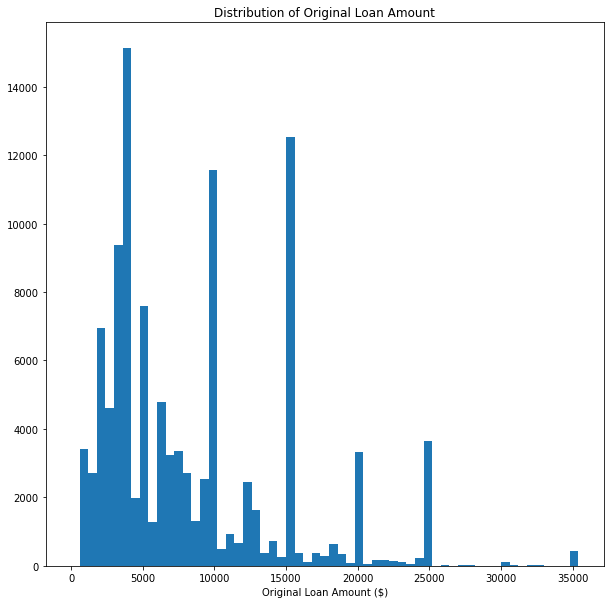

In [16]:
bins1 = np.arange(0, loan1['LoanOriginalAmount'].max()+600, 600)
plt.figure(figsize=[10, 10])
plt.hist(data = loan1, x = 'LoanOriginalAmount', bins = bins1)
plt.xlabel('Original Loan Amount ($)')
plt.ylabel("Count")
plt.title('Distribution of Original Loan Amount')
plt.show()

>From the above figure, we can observe that there are three major peaks in the histogram, also it is slightly skewed to the right. The most common Original Loan amount occuring around 4,500 dollars, while others occured at around 10,000 and slightly above 15000 dollars.

>Considering the type of data and gap that exist in the Loan Original Amount, it is a good idea to transform the scale of the data to check for new insights

In [22]:
#Further exploration by changing the scale of the x-axis 
np.log10(loan1['LoanOriginalAmount'].describe())

count    5.054406
mean     3.921905
std      3.795878
min      3.000000
25%      3.602060
50%      3.812913
75%      4.079181
max      4.544068
Name: LoanOriginalAmount, dtype: float64

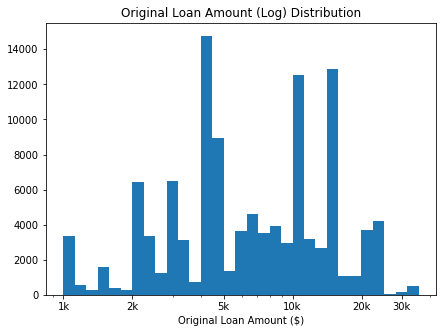

In [23]:
log_bin = np.log10(loan1['LoanOriginalAmount'])
bins2 = 10**np.arange(3.0, log_bin.max()+0.05, 0.05)
plt.figure(figsize=[7, 5])
plt.hist(data = loan1, x = 'LoanOriginalAmount', bins = bins2)
plt.xscale('log')
plt.xticks([1e3, 2e3, 5e3, 1e4, 2e4, 3e4], ['1k', '2k', '5k', '10k', '20k', '30k'])
plt.xlabel('Original Loan Amount ($)')
plt
plt.title('Original Loan Amount (Log) Distribution')
plt.show()

>The figure of the log transformed scale is almost the same as that of the linear scale. It shows three major peaks around 5k, 10k and 15k.


#### I will explore the second variable of Interest: Interest Rate (BorrowerRate)

In [24]:
loan1['BorrowerRate'].describe()

count    113346.000000
mean          0.192898
std           0.074733
min           0.000000
25%           0.134600
50%           0.184000
75%           0.250000
max           0.360000
Name: BorrowerRate, dtype: float64

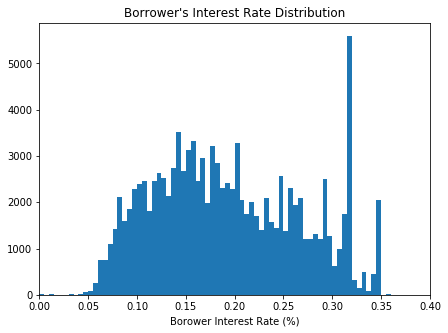

In [25]:
#Histogram to explore the BorrowerRate variable
bins3 = np.arange(0, loan1['BorrowerRate'].max()+0.005, 0.005)
plt.figure(figsize=[7, 5])
plt.hist(data = loan1, x = 'BorrowerRate', bins = bins3)
plt.xlabel('Borower Interest Rate (%)')
plt.xlim(0,0.4)
plt.title("Borrower's Interest Rate Distribution")
plt.show()

> The figure is Unimodal with a very high peak around 0.4% interest rate which is almost symmetric in nature. In other words, the frequency of the borrower's interest rate is fairly distributed around the mean interest rate (0.19%).

#### Exploration of the Predictors: MonthlyIncome, LoanTerm, IncomeVerifiable and CreditScoreRange (Low and High).
#### Stated Monthly Income

In [26]:
loan1['StatedMonthlyIncome'].describe()

count    1.133460e+05
mean     5.605694e+03
std      7.487776e+03
min      0.000000e+00
25%      3.206667e+03
50%      4.666667e+03
75%      6.807937e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

In [27]:
#For this data (Monthly Income) it is important to take transform the scale, but there are zero values
#To fix this a constant value will be added to the monthly income and then computed for 
loan1['StatedMonthlyIncome'] = loan1['StatedMonthlyIncome']+1

In [29]:
#Check to Confirm
loan1['StatedMonthlyIncome'].describe()

count    1.133460e+05
mean     5.606694e+03
std      7.487776e+03
min      1.000000e+00
25%      3.207667e+03
50%      4.667667e+03
75%      6.808937e+03
max      1.750004e+06
Name: StatedMonthlyIncome, dtype: float64

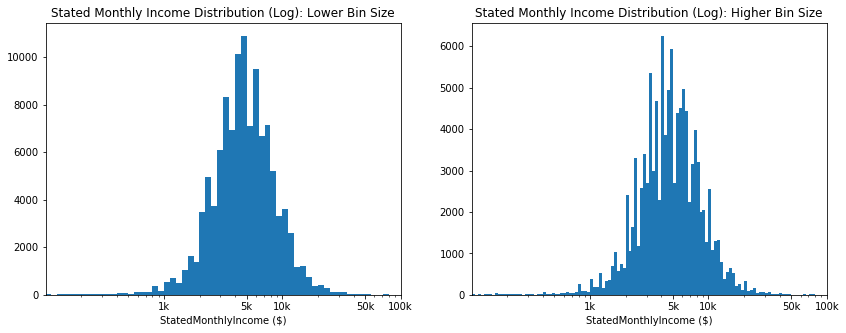

In [30]:
#Creates Subplots of Different Bin Sizes
plt.figure(figsize=[14, 5])

plt.subplot(1, 2, 1)
log_binSM = np.log10(loan1['StatedMonthlyIncome'])
bins5 = 10**np.arange(0, log_binSM.max()+0.05, 0.05)
plt.hist(data = loan1, x = 'StatedMonthlyIncome', bins = bins5)
plt.xscale('log')
plt.xlim(100,30000)
plt.xticks([1e3, 5e3, 1e4, 5e4, 1e5], ['1k', '5k', '10k', '50k', '100k'])
plt.xlabel('StatedMonthlyIncome ($)')
plt.title('Stated Monthly Income Distribution (Log): Lower Bin Size');

plt.subplot(1, 2, 2)
bins6 = 10**np.arange(0, log_binSM.max()+0.025, 0.025)
plt.hist(data = loan1, x = 'StatedMonthlyIncome', bins = bins6)
plt.xscale('log')
plt.xlim(100,30000)
plt.xticks([1e3, 5e3, 1e4, 5e4, 1e5], ['1k', '5k', '10k', '50k', '100k'])
plt.xlabel('StatedMonthlyIncome ($)')
plt.title('Stated Monthly Income Distribution (Log): Higher Bin Size');

> The subplots look similar: unimodal in nature with the highest peak around 5000 dollars and most frequency distributed around the mean value.

#### Loan Term

In [31]:
#To loan term exist in Months, it is a good idea to get the value_counts for the months category
loan1['Term'].value_counts()

36    87187
60    24545
12     1614
Name: Term, dtype: int64

Text(0.5, 1.0, 'Loan Term Categories')

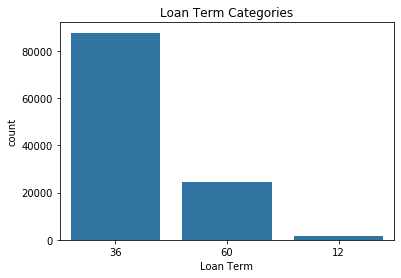

In [33]:
#BarChat to show visualize the Loan Term
lt_color = sb.color_palette()[0]
lt_order = loan1['Term'].value_counts().index
sb.countplot(data=loan, x='Term', color=lt_color, order=lt_order)
plt.xlabel('Loan Term')
plt.title('Loan Term Categories')


>The figure on the Loan term revealed that most of the customers were issued a 36 months Loan Term while 12 month loans have the least frequency.

#### Income Verifiable

In [34]:
loan1['IncomeVerifiable'].value_counts()

True     104690
False      8656
Name: IncomeVerifiable, dtype: int64

Text(0.5, 1.0, 'Income Verifiable Distribution')

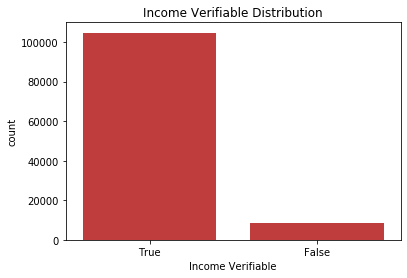

In [35]:
iv_color = sb.color_palette()[3]
iv_order = loan1['IncomeVerifiable'].value_counts().index
sb.countplot(data=loan1, x='IncomeVerifiable', color=iv_color, order=iv_order)
plt.xlabel('Income Verifiable')
plt.title('Income Verifiable Distribution')

>It looks like the verifiable income corresponds with the frequency of stated income that were not Zero values. The figure however, revealed that the most of the income were verifiable.

#### Credit Score Limit (Upper and Lower)

In [36]:
loan1['CreditScoreRangeLower'].value_counts()

680.0    16492
660.0    16366
700.0    15471
720.0    12923
640.0    12199
740.0     9267
760.0     6606
780.0     4624
620.0     4172
600.0     3602
800.0     2644
520.0     1593
540.0     1474
820.0     1409
560.0     1357
580.0     1125
840.0      567
500.0      554
480.0      346
860.0      212
460.0      141
0.0        133
440.0       36
880.0       27
420.0        5
360.0        1
Name: CreditScoreRangeLower, dtype: int64

In [37]:
loan1['CreditScoreRangeUpper'].value_counts()

699.0    16492
679.0    16366
719.0    15471
739.0    12923
659.0    12199
759.0     9267
779.0     6606
799.0     4624
639.0     4172
619.0     3602
819.0     2644
539.0     1593
559.0     1474
839.0     1409
579.0     1357
599.0     1125
859.0      567
519.0      554
499.0      346
879.0      212
479.0      141
19.0       133
459.0       36
899.0       27
439.0        5
379.0        1
Name: CreditScoreRangeUpper, dtype: int64

>The Credit Score data shows that there are errors in the data which are too low in the Credit Score Upper Limit (19.0) and the Credit Score Lower Limit (0.0). They will be replaced with the mean value

In [38]:
#Replace 19.0 in the Upper Limit and 0.0 in the Lower Limit with their Mean value
csl_mean = loan1['CreditScoreRangeLower'].mean()
loan1['CreditScoreRangeLower']= loan1['CreditScoreRangeLower'].replace(0.0, csl_mean)

In [39]:
#Creates a Credit Score from the Upper and Lower Limit by Calculating the Average 
loan1['CreditScore']= (loan1.CreditScoreRangeUpper + loan1.CreditScoreRangeLower)/2
loan1 = loan1.astype({"CreditScore":'int64'})

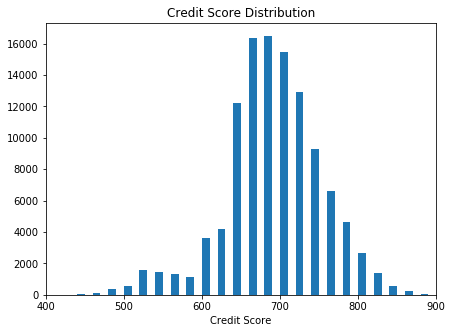

In [40]:
bins7 = np.arange(0, loan1['CreditScore'].max()+10, 10)
plt.figure(figsize=[7, 5])
plt.hist(data = loan1, x = 'CreditScore', bins = bins7)
plt.xlabel('Credit Score')
plt.xlim(400, 900)
plt.title('Credit Score Distribution')
plt.show()

>The histogram is quite slightly skewed to the left. The Credit Score shows that many of the Borrowers have good credit score with the highest peak around 700 and fairly distributed around the mean.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> For the Original Loan Amount, high loan amounts were noticed around 5000, 10000 and 15000 dollars. A log transformation was done to the scale but a similar information was provided. Interestingly, it was revealed that the Borrower Interest Rate (%) shows a unimodal distribution with a very high peak around 0.4% interest rate.
From the stated monthly income, it was revealed that the income is symmetric/unimodal in nature and majorly distributed around 5000 dollars. This indicates that there could be a relationship between the stated monthly income and the Loan amount.
For the Loan term, about 77% of the loans provided were for 36 months.
Histogram plotted for the Credit Score after computation informs that the borrowers have good credit score with highest peak around 700.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> An unusual distribution was obtained from the stated monthly income where the only populated frequency was in 0. A scale transformation was done to get a proper data visuals. Before that, a constant was added to the data before the log transformation since there is a zero value in the records.
A new column Credit Score was created by averaging the Upper Credit Limit and Lower Credit Limit Score.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [41]:
num_var = ['LoanOriginalAmount', 'BorrowerRate', 'StatedMonthlyIncome', 'CreditScore']
cat_var = ['IncomeVerifiable', 'Term']

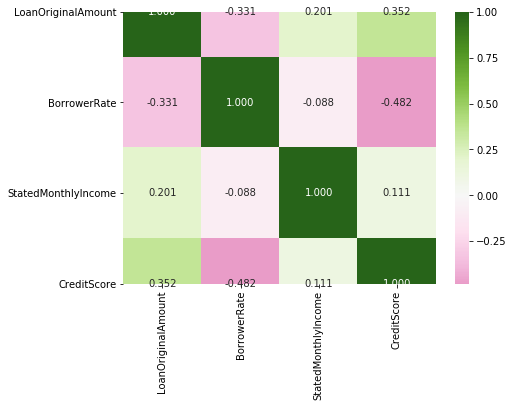

In [52]:
# HeatMap with an annotation of the correlation coefficient of the selected variables
plt.figure(figsize = [7, 5])
sb.heatmap(loan1[num_var].corr(), annot = True, fmt = '.3f', cmap = 'PiYG', center = 0)
plt.show()

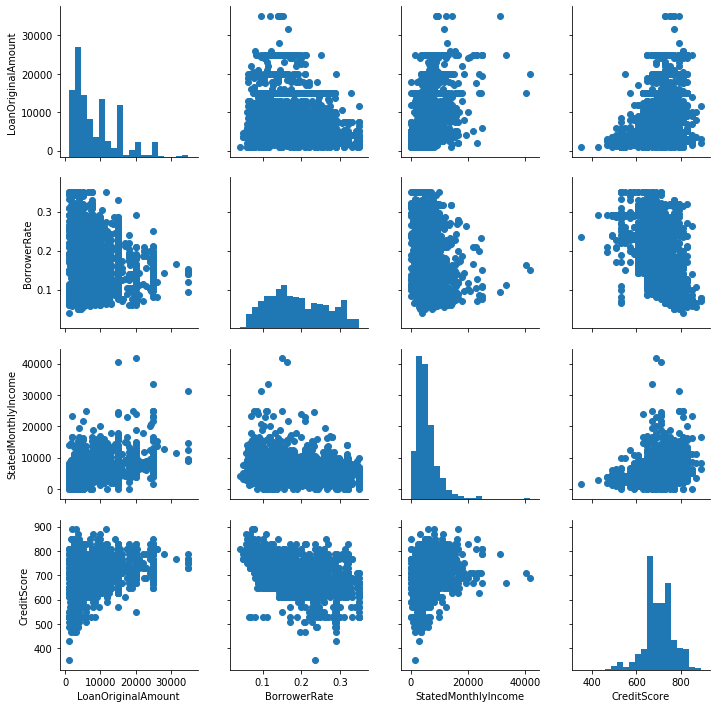

In [53]:
#A sample of 2000 will be used for the plots to render faster
loan1_samp = loan1.sample(n=2000, replace = False)

sct_plt = sb.PairGrid(data = loan1_samp, vars = num_var)
sct_plt = sct_plt.map_diag(plt.hist, bins = 20);
sct_plt.map_offdiag(plt.scatter)

>There is a slight moderate negative correlation between original loan amount and rate which implies that higher loan amount could mean lower interest rate. Although fairly low, the correlation between Loan original amount and stated monthly income and credit score is positive.

>The correlation between borrower rate and stated monthly income is very low and negative. However, the credit score tend to have a negative and moderate relationship with borrower's interest rate.

#### Relationship between Numerical and Categorical Variables

>Relationship between Numberical (Original Loan Amount, Borrowers Interest Rate) and Categorical(Verifiable Income, LoanTerm) using box plot.

<Figure size 504x504 with 0 Axes>

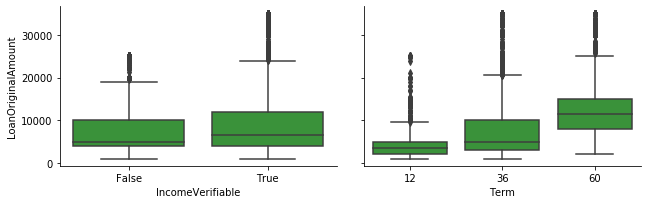

In [54]:
#Boxplot showing relationships
def boxgrid(x, y, **kwargs):
    my_color = sb.color_palette()[2]
    sb.boxplot(x=x, y=y, color=my_color)
    
plt.figure(figsize = [7, 7])
box_plt = sb.PairGrid(data = loan1, y_vars = 'LoanOriginalAmount', x_vars = cat_var,
                height = 3, aspect = 1.5)
box_plt.map(boxgrid)
plt.show();

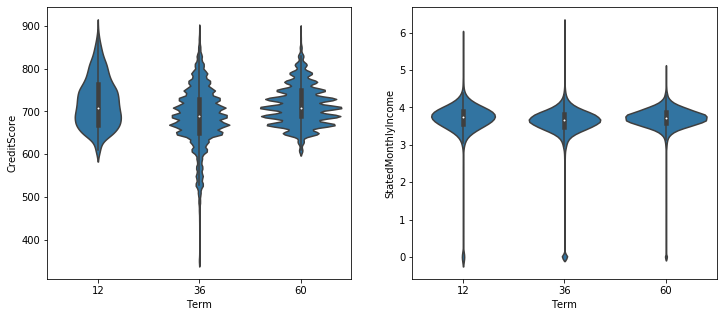

In [55]:
#Violin plot showing relationships
plt.figure(figsize=[12, 5])
plt.subplot(1, 2, 1)
sb.violinplot(data= loan1, y='CreditScore', x='Term', color=sb.color_palette()[0]);

#Uses the Log Scale of the StatedMonthlyIncome 
plt.subplot(1, 2, 2)
sb.violinplot(data= loan1, y=log_binSM, x='Term', color=sb.color_palette()[0]) 

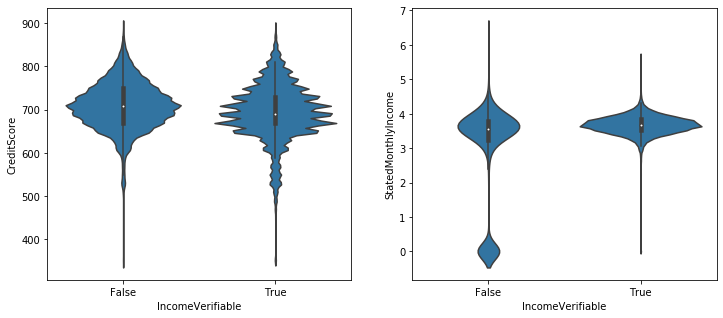

In [56]:
#Violin plot showing relationships
plt.figure(figsize=[12, 5])
plt.subplot(1, 2, 1)
sb.violinplot(data= loan1, y='CreditScore', x='IncomeVerifiable', color=sb.color_palette()[0]);

plt.subplot(1, 2, 2)
sb.violinplot(data= loan1, y=log_binSM, x='IncomeVerifiable', color=sb.color_palette()[0])

#### Relationship between the Categorical variables (Loan Term and Income Verifiable)

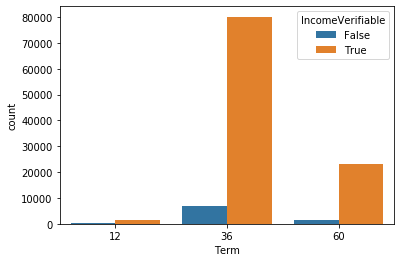

In [57]:
sb.countplot(data = loan1, x = 'Term', hue = 'IncomeVerifiable')

There seem to be a very slight positive correlation between the categorical variables. In other words, the income verified status could possibily influence the loan term.

#### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>A moderate negative relationship exist between original loan amout and interest rate. In other words, higher loan could imply lower interest rate. A slightly positive relationship also exist between original amount and stated monthly income and credit score is positive. On the other hand, a low negative relatioship was discovered between borrower rate and stated monthly income which means that the stated monthly income might not affect the borrower's rate. However, the credit score tend to have a negatively fair relationship with borrower's interest rate.

>Although some positive realtionship exist between the categorical variables and Loan Original amount, they are generally low. The most obivious one is its relationship with Loan term. The loan amount tend to be higher with more loan term. It was also suggested that credit score has no relationship with verifiable income while a positive but very low relationship exist between credit score and loan term.

#### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

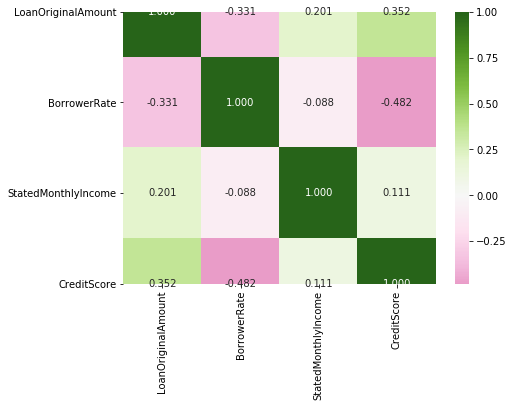

In [58]:
# HeatMap with an annotation of the correlation coefficient of the selected variables
plt.figure(figsize = [7, 5])
sb.heatmap(loan1[num_var].corr(), annot = True, fmt = '.3f', cmap = 'PiYG', center = 0)
plt.show()

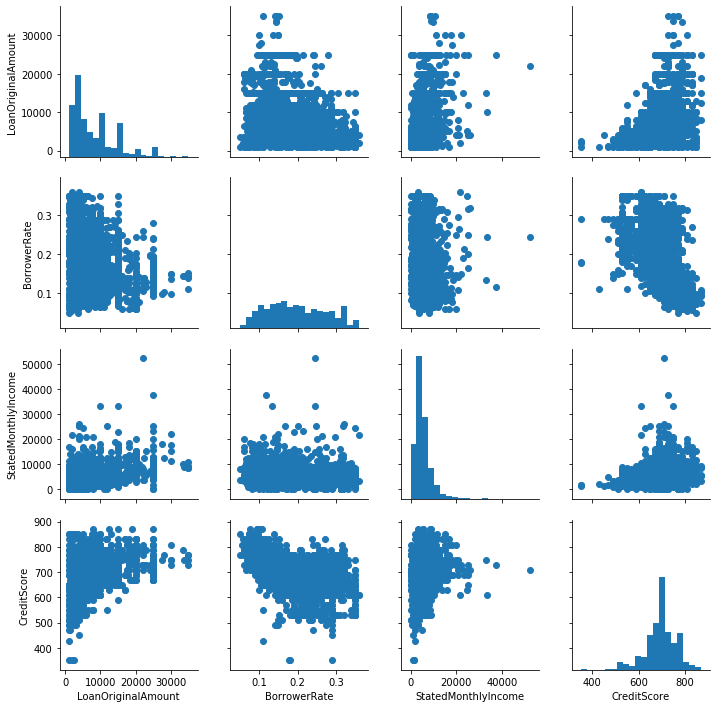

In [59]:
#A sample of 2000 will be used for the plots to render faster
mydata1_samp = loan1.sample(n=2000, replace = False)

sct_plt = sb.PairGrid(data = mydata1_samp, vars = num_var)
sct_plt = sct_plt.map_diag(plt.hist, bins = 20);
sct_plt.map_offdiag(plt.scatter)

>There is a slight moderate negative correlation between original loan amount and rate which implies that higher loan amount could mean lower interest rate. Although fairly low, the correlation between Loan original amount and stated monthly income and credit score is positive.

>The correlation between borrower rate and stated monthly income is very low and negative. However, the credit score tend to have a negative and moderate relationship with borrower's interest rate.

#### Relationship between Numerical and Categorical Variables

<Figure size 504x504 with 0 Axes>

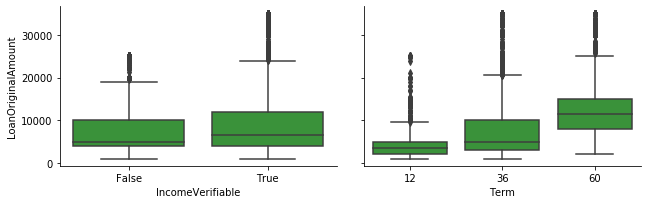

In [60]:
#Boxplot showing relationships
def boxgrid(x, y, **kwargs):
    my_color = sb.color_palette()[2]
    sb.boxplot(x=x, y=y, color=my_color)
    
plt.figure(figsize = [7, 7])
box_plt = sb.PairGrid(data = loan1, y_vars = 'LoanOriginalAmount', x_vars = cat_var,
                height = 3, aspect = 1.5)
box_plt.map(boxgrid)
plt.show();

#### A slight positive relationship exist between the categorical variables and Loan Original amount especially for the case of the Loan term. The loan amount tend to be higher with higher loan term.

Relationship between Numerical (StatedMonthlyIncome, CreditScore) and Categorical(Verifiable Income, LoanTerm)

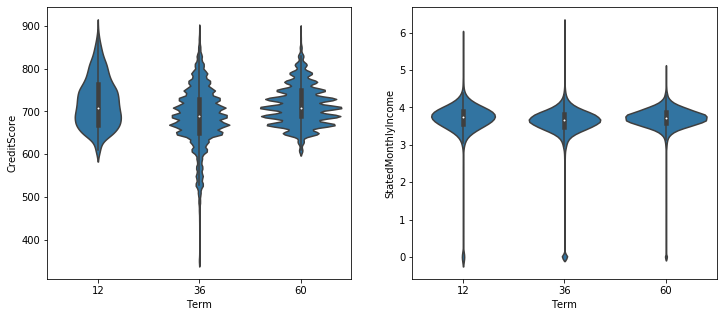

In [61]:
#Violin plot showing relationships
plt.figure(figsize=[12, 5])
plt.subplot(1, 2, 1)
sb.violinplot(data= loan1, y='CreditScore', x='Term', color=sb.color_palette()[0]);

#Uses the Log Scale of the StatedMonthlyIncome 
plt.subplot(1, 2, 2)
sb.violinplot(data= loan1, y=log_binSM, x='Term', color=sb.color_palette()[0])

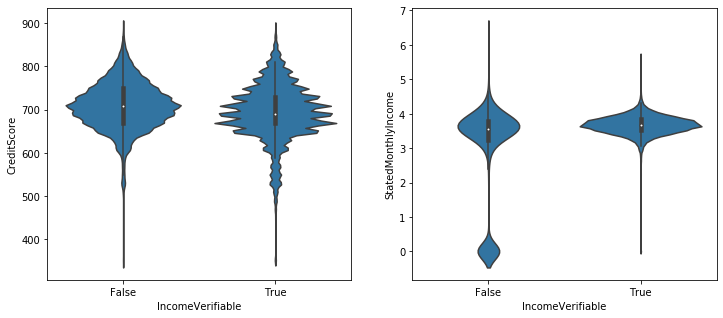

In [62]:
#Violin plot showing relationships
plt.figure(figsize=[12, 5])
plt.subplot(1, 2, 1)
sb.violinplot(data= loan1, y='CreditScore', x='IncomeVerifiable', color=sb.color_palette()[0]);

plt.subplot(1, 2, 2)
sb.violinplot(data= loan1, y=log_binSM, x='IncomeVerifiable', color=sb.color_palette()[0]) 

Information provided in the violin plots suggests that credit score and loan term have very low positive relationship. The relationship of Income verifiable, loan term and stated monthly income is very close to zero.

#### Relationship between the Categorical variables (Loan Term and Income Verifiable)

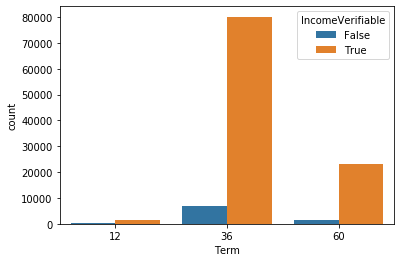

In [65]:
sb.countplot(data = loan1, x = 'Term', hue = 'IncomeVerifiable')

There seem to be a very slight positive correlation between the categorical variables. In other words, the income verified status could possibily influence the loan term.

#### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>A moderate negative relationship exist between original loan amout and interest rate. In other words, higher loan could imply lower interest rate. A slightly positive relationship also exist between original amount and stated monthly income and credit score is positive. On the other hand, a low negative relatioship was discovered between borrower rate and stated monthly income which means that the stated monthly income might not affect the borrower's rate. However, the credit score tend to have a negatively fair relationship with borrower's interest rate.

>Although some positive realtionship exist between the categorical variables and Loan Original amount, they are generally low. The most obivious one is its relationship with Loan term. The loan amount tend to be higher with more loan term. It was also suggested that credit score has no relationship with verifiable income while a positive but very low relationship exist between credit score and loan term.

#### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>Interestingly, a slight positive relationship exist between the categorical variables. In other words, the income verified status could possibily influence the loan term.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

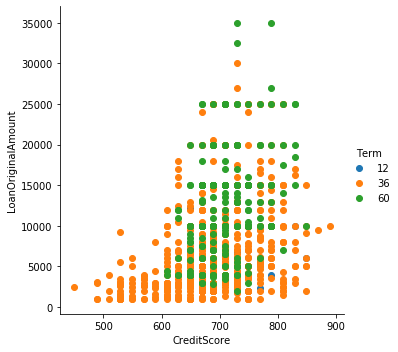

In [66]:
#Select a sample of 1000 for faster rendering and clearer visualization
mydata1_samp2 = loan1.sample(n=1000, replace = False)
#Scatterplot showing the relationship between OriginalLoanAmout and CreditScore while considering LoanTerm
mult_plt = sb.FacetGrid(data = mydata1_samp2, hue = 'Term', height=5)
mult_plt.map(plt.scatter, 'CreditScore', 'LoanOriginalAmount')
mult_plt.add_legend()

Relationship between OriginalLoanAmount and BorrowerRate while considering Loan Term

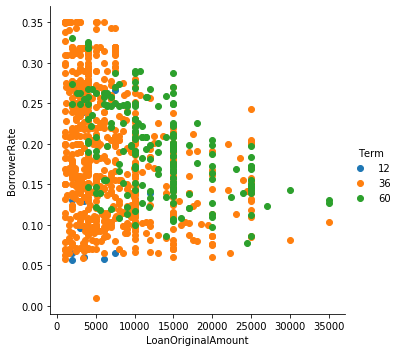

In [67]:
#Select a sample of 1000 for faster rendering and clearer visualization
mydata1_samp2 = loan1.sample(n=1000, replace = False)
#Scatterplot showing the relationship between BorrowerRate and LoanOriginalAmount while considering Loan Term
mult_plt = sb.FacetGrid(data = mydata1_samp2, hue = 'Term', height=5)
mult_plt.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerRate')
mult_plt.add_legend()

Relationship between LoanOriginalAmount and StatedMonthlyIncome while considering Loan Term

Text(0, 0.5, 'Loan Original Amount')

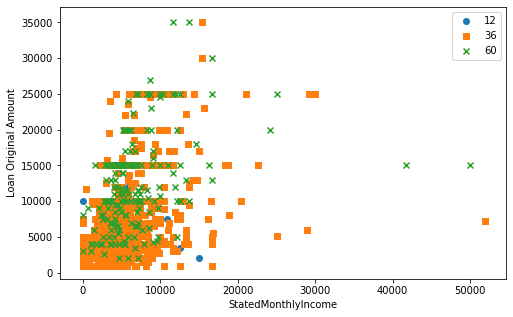

In [68]:
#Create markers to categorize the loan term
cat_mark = [[12, 'o'], [36, 's'], [60, 'x']]

plt.figure(figsize=[8, 5])
for catg, marker in cat_mark:
    mydata_cat = mydata1_samp2[mydata1_samp2['Term'] == catg]
    plt.scatter(data = mydata_cat, y = 'LoanOriginalAmount', x = 'StatedMonthlyIncome', marker = marker)

plt.legend([12, 36, 60])
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('Loan Original Amount')

Relationship between LoanOriginalAmount and BorrowerRate while considering CreditScore

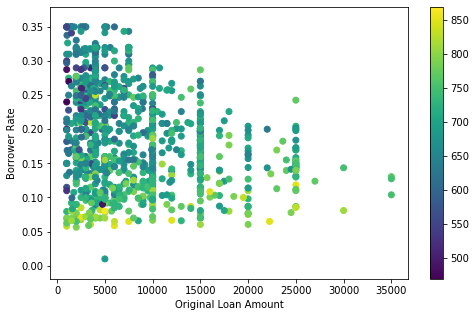

In [69]:
#Scatterplot showing the relationship between BorrowerRate and LoanOriginalAmount while considering CreditScore
plt.figure(figsize=[8, 5])
plt.scatter(data = mydata1_samp2, x = 'LoanOriginalAmount', y = 'BorrowerRate', c = 'CreditScore')
plt.xlabel('Original Loan Amount')
plt.ylabel('Borrower Rate')
plt.colorbar()

Relationship between OriginalLoanAmount and StatedMonthlyIncome while considering Credit Score

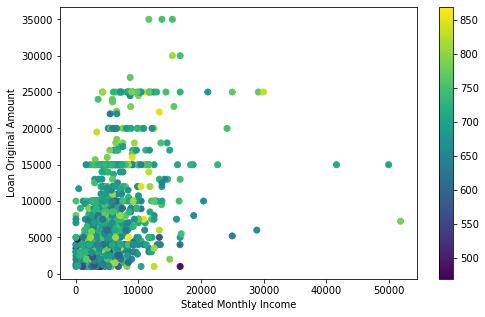

In [70]:
#Scatterplot showing the relationship between LoanOriginalAmount and StatedMonthlyIncome while considering CreditScore
plt.figure(figsize=[8, 5])
plt.scatter(data = mydata1_samp2, y='LoanOriginalAmount', x='StatedMonthlyIncome', c='CreditScore')
plt.xlabel('Stated Monthly Income')
plt.ylabel('Loan Original Amount')
plt.colorbar()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> It is obvious here that despite the positive relationship between Loan amount and credit score, loan terms of 60 months were released to customers that have higher credit score and those with higher loan original amount. Although there isn't much of a difference considering the influence of the term categories on the relationship between interest rate and loan amount. However, it is obvious that lower term is associated with interest rate. 12 months term loans recieved the lowest interest rate while 60months loan terms get higher interest rate.

>It was also revealed in the loan term has a slight influence on the relationship between stated monthly income and loan amount recieved by the borrower. In addition to the relationship between loan recieved and stated monthly income, it was revealed that credit score influence the loan recieved. Customers with higher credit score and higher monthly income recieved higher loan amount.

### Were there any interesting or surprising interactions between features?

> Suprisingly, there are some small original loan amount that recieved high interest rate. However, the plot against credit score showed that the possible reason behind this is that those that recieved low loan amount with high interest rate had lower credit score.

## Conclusions
>The exploration shows that there are multiple factors considered in the interest rate and amount of loan recieved. From the multivariate exploration, it is evident that stated monthly income, credit score and loan terms have significant influence on amount of loan recieved. Notably, customer credit score is the most significant factor.
